## ДЗ «Задачи классификации и кластеризации»
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3).
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


### Решение

In [272]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import colors

iris = load_iris()

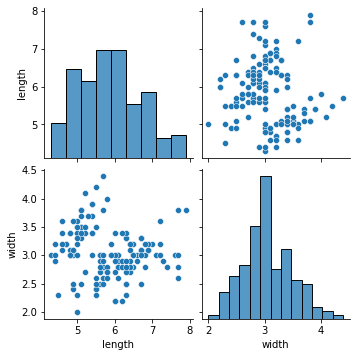

In [274]:


# загружаем данные в датафрейм
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

# Убираем лишние столбцы и переименовываем оставшиеся
irisdf = irisdf[['sepal length (cm)','sepal width (cm)']]
irisdf.rename(columns={'sepal length (cm)':'length', 'sepal width (cm)':'width'}, inplace=True)

# Смотрим отсутствие явной корреляции
sns.pairplot(irisdf)

In [275]:
# Делим на прогнощирующие и тестовые части
X_train, X_test, y_train, y_test = train_test_split( irisdf,  variety, test_size=0.35, random_state=50)

# Загружаем/обучаем
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Коэф. точности проноза: ', accuracy_score(y_test, lda.predict(X_test)))

Коэф. точности проноза:  0.8113207547169812


[[-6.34418169  9.08077115]
 [ 1.84305263 -4.4239227 ]
 [ 4.04976319 -4.11583469]]


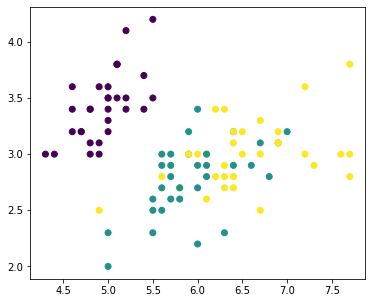

In [276]:
# коэффициенты дискриминатных линий
print(lda.coef_)

# визуализируем дискриминантную линию
plt.scatter(X_train['length'], X_train['width'], c=y_train)
plt.show()
# Визуально отделима только одна группа

In [277]:
irisdf.describe()

,length,width
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


[[4.95483871 3.43225806]
 [5.953125   2.78125   ]
 [6.52941176 2.98235294]]


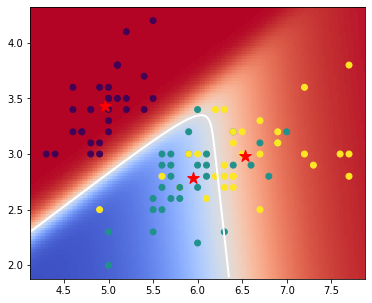

In [278]:
print(lda.means_)
# Попробуем разделить на 3 (должно не получиться) # Получилось странное
plt.scatter(X_train['length'], X_train['width'], c=y_train)
# центры
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# сеткa
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='coolwarm_r',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [279]:
print('Коэффиценты и точность для 3х классов')
print(lda.coef_)
accuracy_score(y_test, lda.predict(X_test))

Коэффиценты и точность для 3х классов
[[-6.34418169  9.08077115]
 [ 1.84305263 -4.4239227 ]
 [ 4.04976319 -4.11583469]]


0.8113207547169812

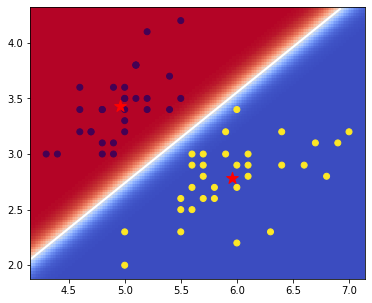

In [280]:
# Убираем целевую переменную
X_trainX = X_train[(y_train != 2)]
y_trainY = list(filter(lambda a: a != 2, y_train))
X_testX = X_test[(y_test != 2)]
y_testY = list(filter(lambda a: a != 2, y_test))


lda2 = LinearDiscriminantAnalysis()
lda2.fit(X_trainX, y_trainY)

# Повторяем шаг выше для 2х категорий/классов
plt.scatter(X_trainX['length'], X_trainX['width'], c=y_trainY)
# центроиды
plt.scatter(lda2.means_[:, 0], lda2.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='coolwarm_r',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')


In [281]:
print('Коэффиценты и точность для 2х классов')
print(lda2.coef_)
print(accuracy_score(y_testY, lda2.predict(X_testX)))

Коэффиценты и точность для 2х классов
[[ 13.30823435 -16.31085565]]
0.972972972972973


### Clusters

In [282]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [283]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [284]:
irisdf.corr()

,length,width
length,1.00000,-0.11757
width,-0.11757,1.00000


In [285]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  150 non-null    float64
 1   width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


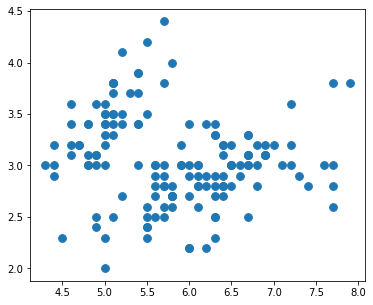

In [286]:
plt.scatter(irisdf['length'], irisdf['width'], cmap='autumn', s=60)

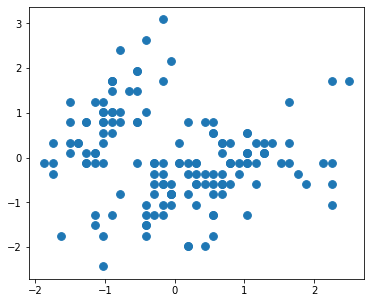

In [287]:
# Нормализуем данные и посмотрим

scaler = StandardScaler()
X_irisdf = scaler.fit_transform(irisdf)
X_irisdf = pd.DataFrame(X_irisdf, columns = ['length','width'])
plt.scatter(X_irisdf['length'], X_irisdf['width'],cmap='autumn', s=60)
# Соотношение/расположение значений/точек не поменялось, предполагаю, что данные не нуждаются в нормализации, но таким образом сократили размах данных

### Метод К-средних

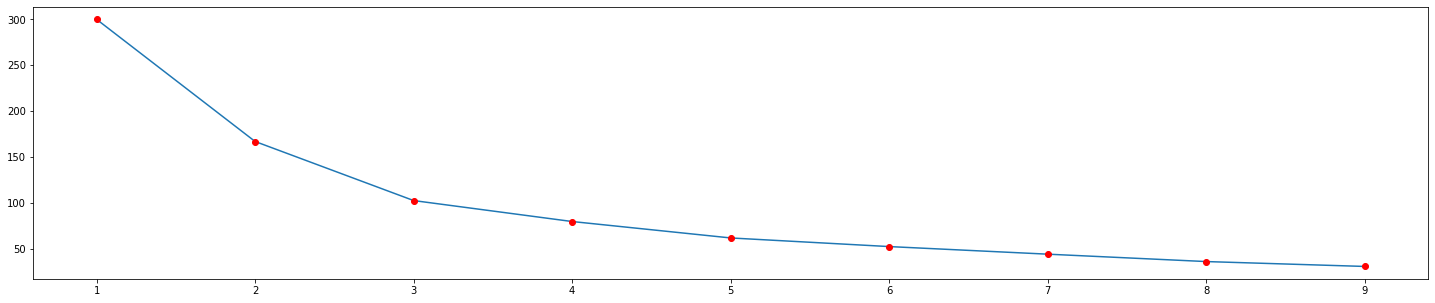

In [288]:
plt.figure(figsize=(25, 5))
# Подбираем оптимальное количество кластеров
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_irisdf)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

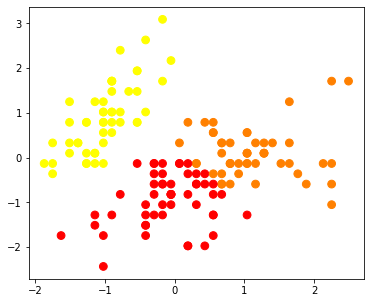

In [289]:
# Оптимальное кол-во вероятно 3
plt.rcParams["figure.figsize"] = (6,5)
kmeans = KMeans(n_clusters=3)
# обучаеем/присваиваем кластер
clusters = kmeans.fit_predict(X_irisdf)
plt.scatter(X_irisdf['length'], X_irisdf['width'],cmap='autumn', c=clusters, s=60)

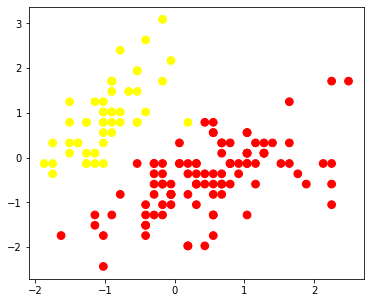

In [295]:
# Вывод - 3 кластера хорошо подходят, т.к. нет явных пересечений точек между областями, две группы из трех более заметно отличаются от третьей, нежели между собой.
# С логической точки зрения возможно использование 2х кластеров даст более "надежный" результат.
# Так же предположу, что из-за увеличения кол-ва кластеров (3 вместо 2) имеются погрешности/пограничные точки (как видно на графике плотность на границе кластеров)
# Поэтому перестраиваем на 2
plt.rcParams["figure.figsize"] = (6,5)
kmeans = KMeans(n_clusters=2)
# обучаеем/присваиваем кластер
clusters = kmeans.fit_predict(X_irisdf)
plt.scatter(X_irisdf['length'], X_irisdf['width'],cmap='autumn', c=clusters, s=60)

### Иерархический

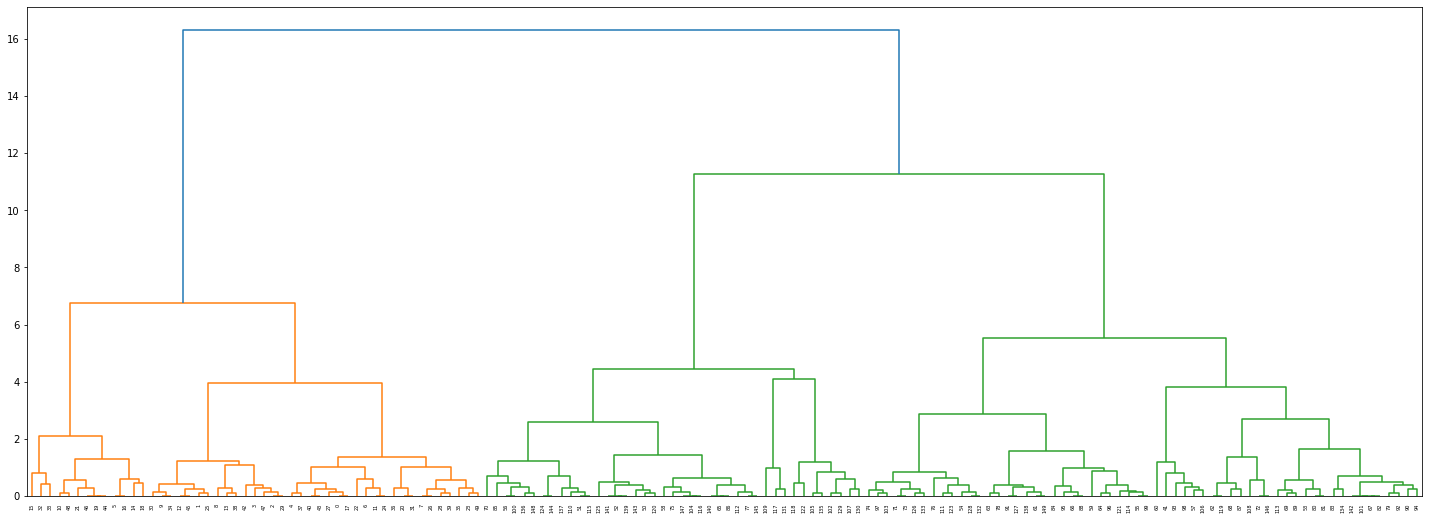

In [291]:
# строим дендрограмму для иерарической картины
Z = hierarchy.linkage(pdist(X_irisdf), 'ward') # метод Уорда
plt.figure(figsize=(25, 9))
dn = hierarchy.dendrogram(Z)
# Визуально - оптимально делить на 2 кластера, либо на 3

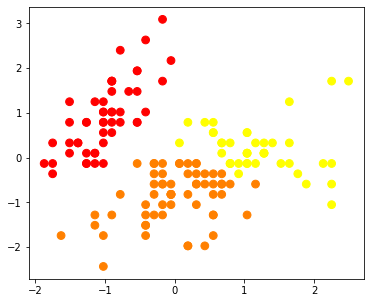

In [292]:
# Делим на кластеры
aglo = AgglomerativeClustering(n_clusters=3)
clusters3 = aglo.fit_predict(X_irisdf)

# print('3 cluster: ', clusters3, '\n2 cluster: ', clusters2)

# И строим скаттеры для наглядности:
plt.scatter(X_irisdf['length'], X_irisdf['width'],cmap='autumn', c=clusters3, s=60)

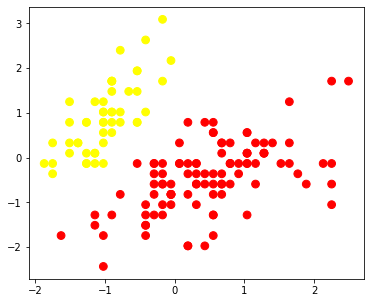

In [293]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters2 = aglo.fit_predict(X_irisdf)
plt.scatter(X_irisdf['length'], X_irisdf['width'],cmap='autumn', c=clusters2, s=60)

In [ ]:
# Видна небольшая разница на границе кластеров относительно метода К-средних для 2х и для 3х кластеров

In [294]:
# Записываем оба наших новых "класса" в оригинальный df
irisdf['2clus_type'] = clusters2
irisdf['3clus_type'] = clusters3

irisdf

,length,width,2clus_type,3clus_type
0,5.1,3.5,1,0
1,4.9,3.0,1,0
2,4.7,3.2,1,0
3,4.6,3.1,1,0
4,5.0,3.6,1,0
...,...,...,...,...
145,6.7,3.0,0,2
146,6.3,2.5,0,1
147,6.5,3.0,0,2
148,6.2,3.4,0,2
